In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/PC/Desktop/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = data[["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", "SalePrice"]]
df.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [7]:
df.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [9]:
df.shape

(1460, 5)

Multi Variable Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# y = a0 + a1x -> Linear Regression
# y = a0 + a1x1 + a2x2 + ....+ anxn -> Multi Variable Linear Regression 
# We should use a Multi Variable Linear Regression model for this dataset.

X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 53018.32669198515


In [34]:
feature_coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coefficient"])
print(feature_coefficients)

               Coefficient
GrLivArea       101.732566
BedroomAbvGr -26704.014676
FullBath      30848.028471
HalfBath       4611.653264


### Interpretation:
Since GrLivArea and FullBath have positive coefficients, this indicates that a larger house and having more full bathrooms increases the house price.

On the other hand, BedroomAbvGr has a negative coefficient, suggesting that having more rooms in a house, especially beyond a certain number, tends to lower the price. This could imply that in the market for larger homes, some features may become less valuable, or in smaller homes, having too many rooms may not be ideal.

HalfBath has a smaller effect on the price but still a positive one. Half bathrooms slightly increase the house value.

### Conclusion:
By analyzing these coefficients, we can understand which features have a more significant impact on the model. Here, we can see that GrLivArea and FullBath have a stronger positive effect on the price. However, the negative effect of BedroomAbvGr is notable, and it might be related to other influencing factors.

In [14]:
df.head(10)

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000
5,1362,1,1,1,143000
6,1694,3,2,0,307000
7,2090,3,2,1,200000
8,1774,2,2,0,129900
9,1077,2,1,0,118000


In [16]:
df["SalePrice"].mean()

180921.19589041095

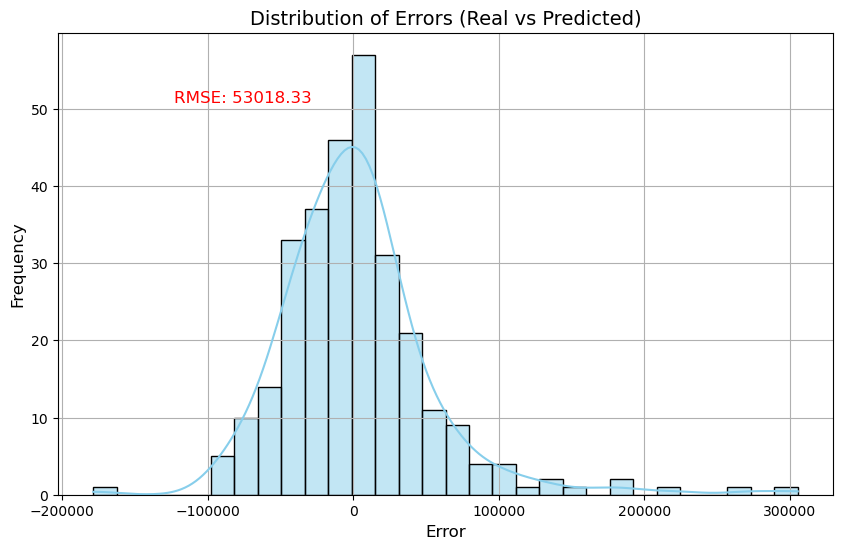

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error  


errors = y_test - y_pred


plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Errors (Real vs Predicted)', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))  


plt.text(0.15, 0.85, f'RMSE: {rmse:.2f}', fontsize=12, color='red', transform=plt.gca().transAxes)

plt.show()


### Applying Linear Regression on a New Dataset with Basement Features Added

#### In this analysis, we aim to predict house prices using linear regression. The dataset initially contained features such as the total square footage of the house (GrLivArea), number of bedrooms (BedroomAbvGr), and the number of bathrooms (FullBath, HalfBath), among others. However, a crucial aspect was missing: the basement features.

#### We enhanced the dataset by adding basement-related features, such as the number of bathrooms in the basement (BsmtFullBath, BsmtHalfBath) and the total square footage of the basement (TotalBsmtSF). This addition provides a more complete representation of the house’s overall livable space and potentially influences the house price.


### 1-) Dataset Preparation:
#### The original dataset, which only considered above-ground features, was modified to include basement features. The new dataset includes:

* #### Total above-ground square footage (GrLivArea)

* #### Bedroom count (BedroomAbvGr)

* #### Full and half bathrooms (FullBath, HalfBath)

* #### Basement square footage (TotalBsmtSF)

* #### Basement bathroom counts (BsmtFullBath, BsmtHalfBath)


### 2-) Modeling with Linear Regression:

#### We applied multiple linear regression to predict house prices (SalePrice). In multiple linear regression, we account for multiple predictor variables (features), rather than just one. The relationship between the target variable (house price) and the predictors (features) is modeled using the formula:

#### 𝑦 = 𝑎0 + 𝑎1𝑥1 + 𝑎2𝑥2 +...+𝑎𝑛𝑥𝑛

 
#### Where:

* #### y is the target variable (SalePrice),
* #### 𝑥1, 𝑥2,...,𝑥𝑛 are the predictor variables (house features),
* #### 𝑎0, 𝑎1, 𝑎2,...,𝑎𝑛 are the coefficients learned by the model.

### 3-) Training and Evaluation:
#### The dataset was split into training and testing sets (80% training, 20% testing). The linear regression model was trained on the training set and evaluated using the testing set. The Root Mean Squared Error (RMSE) was calculated to assess the model's performance. RMSE gives a sense of how far off the predicted prices are from the actual prices, with a lower RMSE indicating better model performance.

### 4-) Results:
#### After adding the basement features, the model’s performance showed improvement, with the RMSE decreasing compared to the initial model that did not include basement-related features. This suggests that basement characteristics have a significant impact on house prices and should be considered in predictive modeling.

In [33]:
df2 = data[["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "SalePrice"]]
df2.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
0,1710,3,2,1,856,1,0,208500
1,1262,3,2,0,1262,0,1,181500
2,1786,3,2,1,920,1,0,223500
3,1717,3,1,0,756,1,0,140000
4,2198,4,2,1,1145,1,0,250000


In [35]:
df.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
SalePrice       0
dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# y = a0 + a1x -> Linear Regression
# y = a0 + a1x1 + a2x2 + ....+ anxn -> Multi Variable Linear Regression 
# We should use a Multi Variable Linear Regression model for this dataset.

X = df2.drop("SalePrice", axis = 1)
y = df2["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 45641.02678441726


In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
